In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import random
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [51]:

random.seed(42)


df = pd.read_csv('donnee_nettoye.csv')


In [52]:
# # define the parameter values that should be searched
# k_range = [1, 3, 5, 7, 9]
# weight_options = ['uniform', 'distance']

# # create a parameter grid: map the parameter names to the values that should be searched
# param_grid = dict(n_neighbors=k_range, weights=weight_options)

# # instantiate and fit the grid
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# # view the complete results
# print(grid.cv_results_)

# # examine the best model
# print(grid.best_params_)
# print(grid.best_score_)

In [53]:
# # define the parameter values that should be searched
# param_grid = {
#     'linearregression__fit_intercept': [True, False],
# }


Modele Lasso

In [54]:
# create a pipeline with StandardScaler and Lasso steps
pipe = make_pipeline(StandardScaler(), Lasso())

# define the parameter values that should be searched
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)




Best validation score = 0.73
Best hyperparameters = {'lasso__alpha': 10.0}
Test performance = 0.81


In [55]:
# Créer un modèle Lasso sans pipeline
# Créer un modèle de régression Lasso
model = Lasso(alpha=1.0)

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.81


Modèle LinearRegression 

In [56]:
# create a pipeline with StandardScaler and LinearRegression steps
pipe = make_pipeline(StandardScaler(), LinearRegression())

# define the parameter values that should be searched
param_grid = {
    'linearregression__fit_intercept': [True, False],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'linearregression__fit_intercept': True}
Test performance = 0.81


In [57]:
# Créer un modèle LinearRegression sans pipeline
# Créer un modèle de régression Lasso
model = LinearRegression()

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.81


In [58]:
# create a pipeline with StandardScaler and LinearRegression steps
pipe = make_pipeline(StandardScaler(), LinearRegression())

# define the parameter values that should be searched
param_grid = {
    'linearregression__fit_intercept': [True, False],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'linearregression__fit_intercept': True}
Test performance = 0.81


In [59]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
pipe = make_pipeline(StandardScaler(), LinearRegression())

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

score 

0.8062382634707147

In [60]:
# create a LinearRegression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# evaluate the model on the test set
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.81


Modèle Ridge

In [61]:
# create a pipeline with StandardScaler and Ridge steps
pipe = make_pipeline(StandardScaler(), Ridge())

# define the parameter values that should be searched
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0],
    'ridge__max_iter': [100, 1000, 10000],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'ridge__alpha': 10.0, 'ridge__max_iter': 100}
Test performance = 0.80


In [62]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
pipe = make_pipeline(StandardScaler(), Ridge())

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

score 

0.8062382634707147

In [63]:
# create a LinearRegression model
model = Ridge()

# train the model on the training set
model.fit(X_train, y_train)

# evaluate the model on the test set
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.81


Modèle ElasticNet

In [64]:
# create a pipeline with StandardScaler and ElasticNet steps
pipe = make_pipeline(StandardScaler(), ElasticNet())

# define the parameter values that should be searched
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],
    'elasticnet__max_iter': [100, 1000, 10000],
}

# select the columns of interest as explanatory variables
X = df.drop('charges', axis=1)

# select the target column
y = df['charges']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# train the model using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)




Best validation score = 0.73
Best hyperparameters = {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 100}
Test performance = 0.80


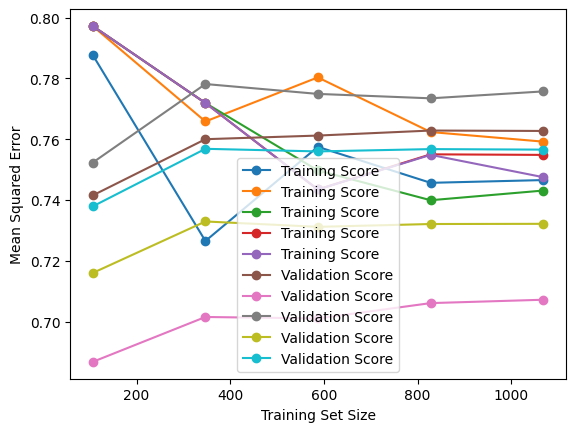

In [65]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
pipe = make_pipeline(StandardScaler(), ElasticNet())

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

score 


# Generate the training set sizes and training/validation scores
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, train_scores, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores, 'o-', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

In [66]:
# create a LinearRegression model
model = ElasticNet()

# train the model on the training set
model.fit(X_train, y_train)

# evaluate the model on the test set
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.39


Pour calculer les résidus 
$$ residus = y - \hat{y} $$

Où y est la colonne cible et $\hat{y}$ est la prédiction du modèle.

899     -2851.823836
1063    -3822.196476
1255    -5258.967084
298     21300.096753
237     -8602.168396
            ...     
534     -6471.277308
542     -4678.892100
759     -5266.050723
1283    23078.999853
1284    -2671.322965
Name: charges, Length: 268, dtype: float64


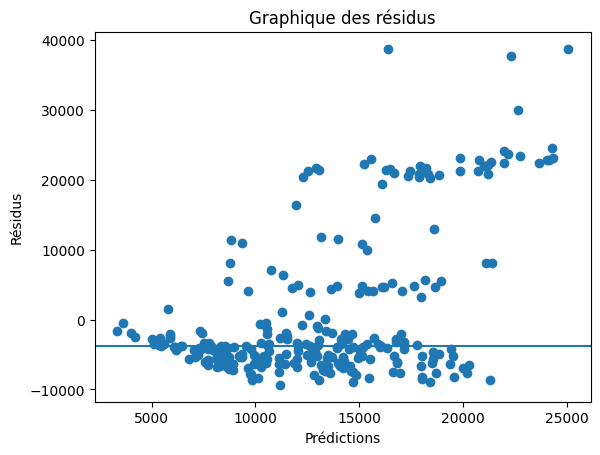

In [67]:
# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# print the residues
print(residues)
# Prédictions de la régression
predictions = model.predict(X_test)

# Calcul des résidus
residuals = y_test - predictions

# Affichage du graphique des résidus
plt.scatter(predictions, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=residuals.median())
plt.title('Graphique des résidus')
plt.show()


Pour calculer le carré des résidus
Vous pouvez également calculer la somme des carrés des résidus (SSR) en utilisant la formule suivante :

$$ SSR = \sum_{i=1}^{n} residus_i^2 $$

Voici comment vous pouvez calculer et afficher la SSR dans votre code :

29997313408.29721


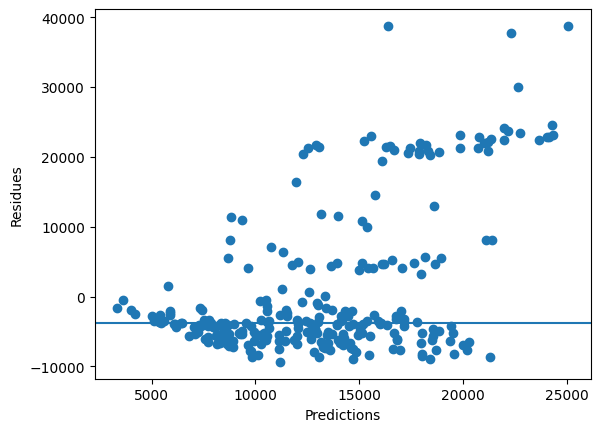

SSR = 29997313408.30
[0.39754343 0.39716771 0.37891702 0.40379918 0.36553935]
Moyenne des scores : 0.39


In [68]:
# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# calculate the sum of squared residues
ssr = np.sum(residues ** 2)

# print the sum of squared residues
print(ssr)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# calculate the sum of squared residues
ssr = np.sum(residues ** 2)

# create a scatter plot of the residues
plt.scatter(y_pred, residues)
plt.xlabel('Predictions')
plt.ylabel('Residues')
plt.axhline(y=residues.median())
plt.show()

# print the sum of squared residues
print(f"SSR = {ssr:.2f}")


# Utilisation de la fonction cross_val_score pour effectuer un test de cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Affichage des scores
print(scores)

# Calcul de la moyenne des scores
mean_score = np.mean(scores)

print(f"Moyenne des scores : {mean_score:.2f}")

Info interessante

In [69]:
# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# Définition des hyperparamètres à tester
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0],
    'regressor__max_iter': [100, 1000, 10000]
}

# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
model = Lasso(alpha=1.0)

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


# Entraînement du modèle en utilisant une validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluation du modèle sur le jeu de test
print(f"Meilleur score de validation = {grid_search.best_score_:.2f}")
print(f"Meilleurs hyperparamètres = {grid_search.best_params_}")
print(f"Performance sur le test = {grid_search.score(X_test, y_test):.2f}")

# use the best model to make predictions

# use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)



# predictions = GridSearchCV.grid.predict(X_test)


Le score du modèle sur l'ensemble de test est : 0.81
Meilleur score de validation = 0.73
Meilleurs hyperparamètres = {'regressor__alpha': 10.0, 'regressor__max_iter': 100}
Performance sur le test = 0.81


Créer un dummy modèle comme moyen de comparaison

In [70]:

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.008391982350864469

In [71]:
#Pour standardiser un dataframe
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



In [72]:
# create the StandardScaler instance
scaler = StandardScaler()

# fit the scaler to the data
scaler.fit(X)

# transform the data
X_scaled = scaler.transform(X)

In [73]:

# create the OneHotEncoder instance
encoder = OneHotEncoder()

# fit the encoder to the data
encoder.fit(X)

# transform the data
X_encoded = encoder.transform(X)

In [74]:

# create a pipeline with StandardScaler and OneHotEncoder steps
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder())
])

# fit and transform the data
X_processed = pipe.fit_transform(X)
# create a pipeline with StandardScaler and OneHotEncoder steps
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder())
])

# fit and transform the data
X_processed = pipe.fit_transform(X)

In [75]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression Lasso
model = Lasso(alpha=1.0)

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

Le score du modèle sur l'ensemble de test est : 0.81


In [76]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

Le score du modèle sur l'ensemble de test est : 0.81


Le score du modèle sur l'ensemble de test est : 0.39


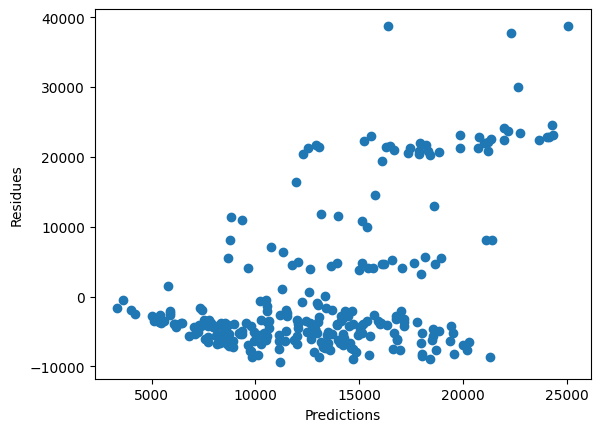

SSR = 29997313408.30


In [77]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the residues
residues = y_test - y_pred

# calculate the sum of squared residues
ssr = np.sum(residues ** 2)

# create a scatter plot of the residues
plt.scatter(y_pred, residues)
plt.xlabel('Predictions')
plt.ylabel('Residues')
plt.show()

# print the sum of squared residues
print(f"SSR = {ssr:.2f}")

Le score du modèle sur l'ensemble de test est : 0.39


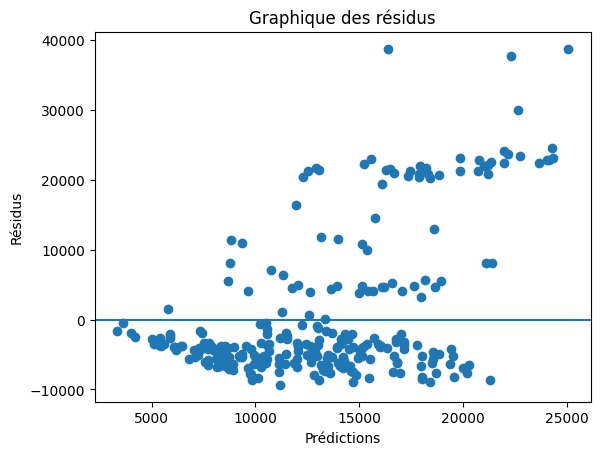

In [78]:
# Sélectionner les colonnes d'intérêt comme variables explicatives
X = df.drop('charges', axis=1)

# Sélectionner la colonne cible
y = df['charges']

# Séparer les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

# Créer un modèle de régression ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Entraîner le modèle sur l'ensemble de formation
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


# Prédictions de la régression
predictions = model.predict(X_test)

# Calcul des résidus
residuals = y_test - predictions

# Affichage du graphique des résidus
plt.scatter(predictions, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0)
plt.title('Graphique des résidus')
plt.show()

1.0961202256549193e-06


<AxesSubplot: xlabel='predictions', ylabel='y_test'>

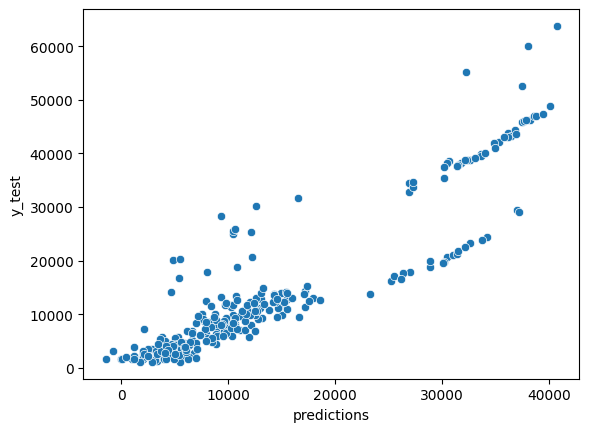

In [79]:

# Séparation des données en matrices X et y
X = df.drop(columns='charges')
y = df['charges']

# Entraînement d'un modèle de forêt aléatoire
model = Ridge()
model.fit(X, y)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test)

# Calculer la distance de Cook pour évaluer la qualité des prédictions
cook_distance = (y_test - predictions).mean() / (y_test.var() + predictions.var())

print(cook_distance)
# Calcul des résidus du modèle
residuals = y_test - predictions

# Calcul de la distance de Cook pour chaque résidu
cook_distances = np.abs(residuals) / (y_test.var() + predictions.var())

# Seuil de distance de Cook à partir duquel un résidu est considéré comme suspect
threshold = 1

# Filtrage des résidus suspects
filtered_residuals = residuals[cook_distances < threshold]

# Calcul de la moyenne et de la variance des résidus filtrés
mean_filtered_residuals = filtered_residuals.mean()
var_filtered_residuals = filtered_residuals.var()


# Création d'un dataframe avec les prédictions et les valeurs réelles pour les résidus filtrés
df_cook = pd.DataFrame({'predictions': predictions[cook_distances < threshold], 'y_test': y_test[cook_distances < threshold]})

# Affichage d'un nuage de points entre les prédictions et les valeurs réelles pour les résidus filtrés
sns.scatterplot(data=df_cook, x='predictions', y='y_test')

In [80]:
df_cook

,predictions,y_test
899,7765.679398,8688.85885
1063,5362.952285,5708.86700
1255,14773.063158,11436.73815
298,32600.799366,38746.35510
237,8835.018466,4463.20510
...,...,...
534,17078.083571,13831.11520
542,15532.307479,13887.20400
759,5953.416102,3925.75820
1283,39419.064183,47403.88000


<AxesSubplot: xlabel='charges', ylabel='Count'>

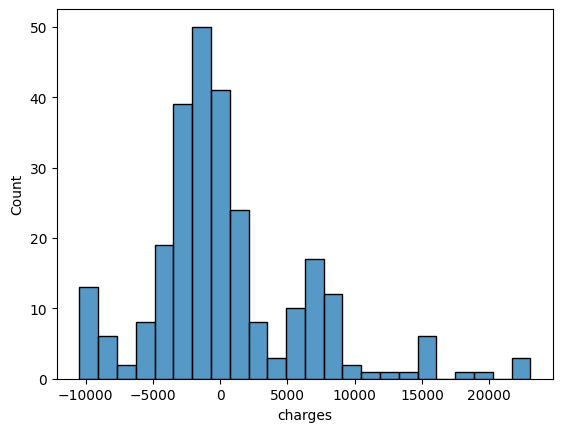

In [81]:
# Affichage d'un histogramme des résidus filtrés
sns.histplot(filtered_residuals)

In [82]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Générer des données artificielles pour l'exemple
# X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)

# # Séparer les données en ensemble d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Créer un objet de régression logistique
# clf = LogisticRegression()

# # Entraîner le modèle sur les données d'entraînement
# train_scores = []
# test_scores = []
# for i in range(1, X_train.shape[0]+1):
#     clf.fit(X_train[:i], y_train[:i])
#     train_scores.append(clf.score(X_train[:i], y_train[:i]))
#     test_scores.append(clf.score(X_test, y_test))

# # Tracer les courbes d'apprentissage
# plt.plot(train_scores, label="Score en entraînement")
# plt.plot(test_scores, label="Score en test")
# plt.legend()
# plt.show()

In [83]:
# # Create a classification model
# model = SomeClassifier()

# # Generate the training set sizes and training/validation scores
# train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, train_scores, 'o-', label='Training Score')
# plt.plot(train_sizes, val_scores, 'o-', label='Validation Score')
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy Score')
# plt.legend(loc='best')
# plt.show()

In [84]:

# # Create a regression model
# model = SomeRegressor()

# # Generate the training set sizes and training/validation scores
# train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, train_scores, 'o-', label='Training Score')
# plt.plot(train_sizes, val_scores, 'o-', label='Validation Score')
# plt.xlabel('Training Set Size')
# plt.ylabel('Mean Squared Error')
# plt.legend(loc='best')
# plt.show()


In [85]:
# from sklearn.model_selection import StratifiedKFold
# #Pour évaluer un modèle
# # Créer un objet StratifiedKFold avec 5 plis, en utilisant un mélange aléatoire pour répartir les données dans les plis
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# # Itérer sur les plis de l'objet StratifiedKFold
# for train_index, test_index in skf.split(X, y):
#     # Séparer les données en ensemble d'entraînement et de test
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Entraîner et évaluer un modèle sur cet ensemble d'entraînement et de test
#     model.fit(X_train, y_train)
#     score = model.score(X_test, y_test)
#     print(f'Score du modèle sur le pli courant: {score:.3f}')

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
Fold 0:
  Train: index=[1 3]
  Test:  index=[0 2]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1 3]


In [87]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# def stratified_cross_validate(model, X, y, n_splits=5, random_state=42):
#     skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
#     scores = []
    
#     for train_index, test_index in skf.split(X, y):
#         clone_model = clone(model)
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
        
#         clone_model.fit(X_train, y_train)
#         score = clone_model.score(X_test, y_test)
#         scores.append(score)
        
#     return scores

# # Exemple d'utilisation
# scores = stratified_cross_validate(model, X, y)
# mean_score = np.mean(scores)
# std_score = np.std(scores)
# print(f'Score moyen: {mean_score:.3f}')
# print(f'Écart-type du score: {std_score:.3f}')

In [88]:
# from sklearn.model_selection import cross_validate

# scores = cross_validate(model, X, y, cv=5)


In [89]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# import pandas as pd

# # Créer un jeu de données de démo
# data = {'age': [25, 30, 35, 40, 45, 50],
#         'income': [45000, 50000, 60000, 65000, 80000, 100000],
#         'gender': ['M', 'F', 'M', 'F', 'M', 'F'],
#         'student': [1, 1, 0, 0, 0, 1]}
# df = pd.DataFrame(data)

# # définir les colonnes qui seront transformées
# numerical_features = ['age', 'income']
# categorical_features = ['gender', 'student']

# # définir les étapes dans le pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ])

# # Ajoutez une étape de modèle
# clf = LogisticRegression()

# # Créer le pipeline
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', clf)])

# # diviser les données en ensemble d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2)

# # entraîner le modèle
# pipe.fit(X_train, y_train)

# # faire des prévisions sur l'ensemble de test
# y_pred = pipe.predict(X_test)

# # évaluer les performances du modèle
# print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

In [90]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Créer des données de test (matrice numpy 2D)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
print("Données d'entrée: \n", X)

# Initialiser un objet StandardScaler
scaler = StandardScaler()

# Appliquer la méthode fit_transform sur les données d'entrée
X_scaled = scaler.fit_transform(X)
print("Données normalisée: \n", X_scaled)

Données d'entrée: 
 [[1 2]
 [2 3]
 [3 4]
 [4 5]]
Données normalisée: 
 [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]
